In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from itertools import combinations

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en Solarize_Lihgt2. 
plt.style.use('Solarize_Light2')


In [2]:
df = pd.read_csv("data/archivo_casi_listo.csv",index_col = 0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [3]:
numericas = df.select_dtypes(include="number").columns
numericas

Index(['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')

In [4]:
numericas_lista = ['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud']

for columna in numericas_lista:
    media = df[columna].mean ()
    mediana = df[columna].median ()
    desviacion = df[columna].std ()
    minimo = df[columna].min ()
    maximo = df[columna].max ()
    print (columna.upper())
    print (f"La media es {np.round(media,2)}; la mediana {np.round(mediana,2)}; la desviación {np.round(desviacion,2)}; mínimo {np.round(minimo,2)}, maximo {np.round(maximo,2)} ")
    print (".......")

DENSITY
La media es 356.76; la mediana 89.0; la desviación 1982.89; mínimo 2.0, maximo 26337.0 
.......
AGRICULTURALLAND
La media es 39.13; la mediana 39.6; la desviación 21.39; mínimo 0.6, maximo 82.6 
.......
LANDAREA
La media es 689624.37; la mediana 119511.0; la desviación 1921609.23; mínimo 0.0, maximo 17098240.0 
.......
ARMEDFORCESSIZE
La media es 159274.85; la mediana 31000.0; la desviación 380628.8; mínimo 0.0, maximo 3031000.0 
.......
BIRTHRATE
La media es 20.15; la mediana 17.95; la desviación 9.8; mínimo 5.9, maximo 46.08 
.......
CALLINGCODE
La media es 360.01; la mediana 255.5; la desviación 322.49; mínimo 1.0, maximo 1876.0 
.......
CO2-EMISSIONS
La media es 177799.24; la mediana 12303.0; la desviación 838790.27; mínimo 11.0, maximo 9893038.0 
.......
CPI
La media es 190.46; la mediana 125.34; la desviación 397.95; mínimo 99.03, maximo 4583.71 
.......
CPICHANGE
La media es 6.72; la mediana 2.3; la desviación 24.45; mínimo -4.3, maximo 254.9 
.......
FERTILITYRATE
La me

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos

In [5]:
df.sort_values("density").head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
114,Mongolia,2.0,MN,71.5,1564116.0,18000.0,24.13,976.0,Ulaanbaatar,25368.0,195.76,7.3,MNT,2.9,8.0,0.72,1.385285e+10,104.0,65.6,14.0,Ulaanbaatar,69.7,45.0,0.65,Mongolian,39.3,2.86,3225167.0,59.7,16.8,25.7,6.01,2210626.0,46.862496,103.846656,Asia


In [6]:
df.sort_values("density").tail(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent
113,Monaco,26337.0,MC,39.6,2.0,NaN,5.9,377.0,Monaco City,NaN,NaN,NaN,EUR,2.245,32.0,2.0,7.184844e+09,NaN,31.2,2.6,Monaco City,73.2,NaN,11.72,French,6.1,6.56,38964.0,62.45,16.3,NaN,NaN,38964.0,43.738418,7.424616,Europe


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos

In [7]:
df["birthrate"].mean()

20.145282051282052

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil

In [8]:
percentiles = np.nanpercentile(df["infantmortality"], [0,25, 75,100]) #Calculamos los percentiles de mortalidad infantil

In [9]:
#df["infantmortality"].describe() #Otra forma de ver los percentiles sería con el describe

In [10]:
#Definimos una función para deterinar los rangos
def mortalidad(numero):
    if numero == np.nan:
        return "unknown"
    elif numero < percentiles[1]:
        return "baja"
    elif numero > percentiles[2]:
        return "alta"
    else:
        return "moderada"

In [11]:
#Creamos una columna nueva, en base a los rangos definidos en la función de arriba
df["infantmortality_new"] = df["infantmortality"].apply(mortalidad)

In [12]:
df.head()

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent,infantmortality_new
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia,alta
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europe,moderada
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Africa,moderada
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,NaN,6.63,Catalan,36.4,3.33,77142.0,62.45,16.3,NaN,NaN,67873.0,42.506285,1.521801,Europe,baja
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa,alta


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [13]:
df_correlacion = df[["fertilityrate", "lifeexpectancy"]].corr(method="spearman")
df_correlacion

,fertilityrate,lifeexpectancy
fertilityrate,1.00000,-0.83538
lifeexpectancy,-0.83538,1.00000


In [14]:
#Existe una correlación negativa entre la tasa de fertilidad y la esperanza de vida: Cuando la tasa de fertilidad en un país es mayor, su esperanza de vida es menor

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción

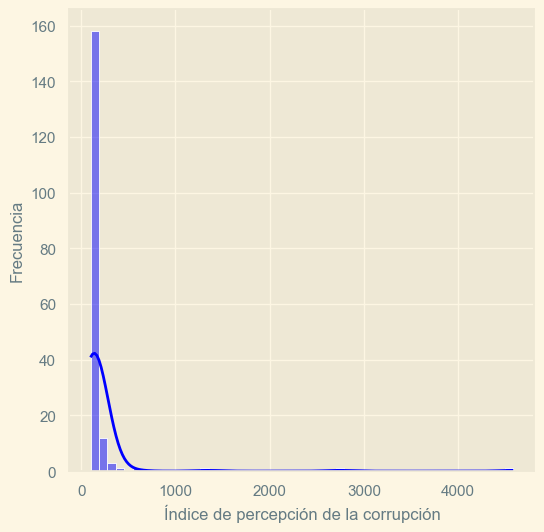

In [15]:
plt.figure(figsize=(6, 6))

sns.histplot(data=df, x="cpi", bins = 50, kde=True, color='blue')

plt.xlabel("Índice de percepción de la corrupción")
plt.ylabel("Frecuencia");

In [16]:
#La inmensa mayoría de los países tienen un índice de percepción de la corrupción menor de 300 

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono)

In [17]:
df["diferencia"] = df["gdp"] - df["co2-emissions"]

In [18]:
df.sort_values("diferencia",ascending=False).head(1)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,continent,infantmortality_new,diferencia
186,United States,36.0,US,44.4,9833517.0,1359000.0,11.6,1.0,"Washington, D.C.",5006302.0,117.24,7.5,USD,1.73,33.9,0.71,2.142770e+13,101.8,88.2,5.6,New York City,78.5,19.0,7.25,Unknown,11.1,2.61,328239523.0,62.0,9.6,36.6,14.7,270663028.0,37.09024,-95.712891,North America,baja,2.142769e+13


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países

In [19]:
porcentaje_promedio = df["populationlaborforceparticipation"].mean()
print(f"El porcentaje promedio de participación en la fuerza laboral es: {porcentaje_promedio:.2f}%")

El porcentaje promedio de participación en la fuerza laboral es: 62.71%


9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas

In [20]:
# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns
numericas

Index(['density', 'agriculturalland', 'landarea', 'armedforcessize',
       'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange',
       'fertilityrate', 'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitud',
       'longitud', 'diferencia'],
      dtype='object')

In [21]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr(numeric_only = True, method = "spearman")
df_correlaciones

,density,agriculturalland,landarea,armedforcessize,birthrate,callingcode,co2-emissions,cpi,cpichange,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,lifeexpectancy,maternalmortalityratio,minimumwage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitud,longitud,diferencia
density,1.000000,0.147372,-0.579424,0.105384,-0.261107,-0.026299,-0.009172,-0.194308,-0.177130,-0.254869,-0.115015,0.166272,-0.006516,0.028644,0.022805,-0.172333,0.211272,-0.144929,0.106410,0.008887,0.084090,-0.085660,-0.058024,0.056559,-0.048854,-0.215339,-0.057839,0.137098,0.080083,0.030154
agriculturalland,0.147372,1.000000,0.144767,0.162973,0.168414,-0.042598,0.074322,0.230465,0.231436,0.160531,-0.384844,0.022820,0.079518,-0.060650,-0.127699,0.197423,-0.215144,0.144910,-0.189257,0.103314,-0.079600,0.271199,-0.157066,-0.057405,0.158840,0.055267,0.232545,0.006225,-0.011380,0.070745
landarea,-0.579424,0.144767,1.000000,0.575037,0.259924,-0.284213,0.584187,0.401461,0.333871,0.241362,-0.136160,-0.305351,0.583055,0.000739,0.017603,0.216256,-0.188076,0.196945,-0.196361,0.217502,-0.122541,0.813623,-0.011433,-0.394373,0.245582,0.045625,0.776581,-0.050020,0.056931,0.558848
armedforcessize,0.105384,0.162973,0.575037,1.000000,-0.141813,-0.261176,0.735598,0.138153,0.119756,-0.122133,-0.131597,-0.220918,0.707670,0.019564,0.272653,-0.114122,0.157792,-0.130084,0.086141,0.247042,0.141343,0.818154,-0.104007,-0.260803,0.187224,-0.089815,0.828893,0.156043,0.257734,0.707670
birthrate,-0.261107,0.168414,0.259924,-0.141813,1.000000,0.162260,-0.418355,0.400977,0.237546,0.973552,-0.083542,-0.298090,-0.406352,0.062770,-0.766128,0.895200,-0.845522,0.856945,-0.657015,0.239035,-0.845295,0.133268,0.198997,-0.370934,0.168458,-0.055770,-0.009899,-0.581999,0.041312,-0.446685
callingcode,-0.026299,-0.042598,-0.284213,-0.261176,0.162260,1.000000,-0.277268,0.087829,-0.016856,0.160455,-0.080934,-0.138525,-0.356442,-0.068676,-0.213008,0.106171,-0.145160,0.051555,-0.151760,-0.055086,-0.074278,-0.343347,0.077096,0.021825,-0.334636,-0.091476,-0.354691,-0.042181,0.303856,-0.351688
co2-emissions,-0.009172,0.074322,0.584187,0.735598,-0.418355,-0.277268,1.000000,0.061246,0.047506,-0.404570,-0.193107,-0.212745,0.948399,-0.038222,0.527387,-0.447768,0.453992,-0.499279,0.307173,0.040436,0.490246,0.728088,-0.171476,-0.186106,0.035439,-0.050298,0.834269,0.388038,0.128445,0.948399
cpi,-0.194308,0.230465,0.401461,0.138153,0.400977,0.087829,0.061246,1.000000,0.813991,0.372278,-0.088203,-0.339825,0.008133,0.098795,-0.273592,0.433978,-0.435394,0.431473,-0.488853,0.216103,-0.294789,0.337583,0.026939,-0.318406,0.102826,0.057266,0.256383,-0.269893,0.156215,-0.003296
cpichange,-0.177130,0.231436,0.333871,0.119756,0.237546,-0.016856,0.047506,0.813991,1.000000,0.216461,-0.032577,-0.146713,0.020980,0.043075,-0.171739,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.261089,-0.050647,-0.223032,0.095983,0.159493,0.212148,-0.103175,0.034444,0.013890
fertilityrate,-0.254869,0.160531,0.241362,-0.122133,0.973552,0.160455,-0.404570,0.372278,0.216461,1.000000,-0.069000,-0.271034,-0.405568,0.048688,-0.743367,0.862218,-0.835380,0.830900,-0.598073,0.179680,-0.810827,0.110225,0.179108,-0.368122,0.171121,-0.071483,-0.024275,-0.566365,0.036192,-0.432389


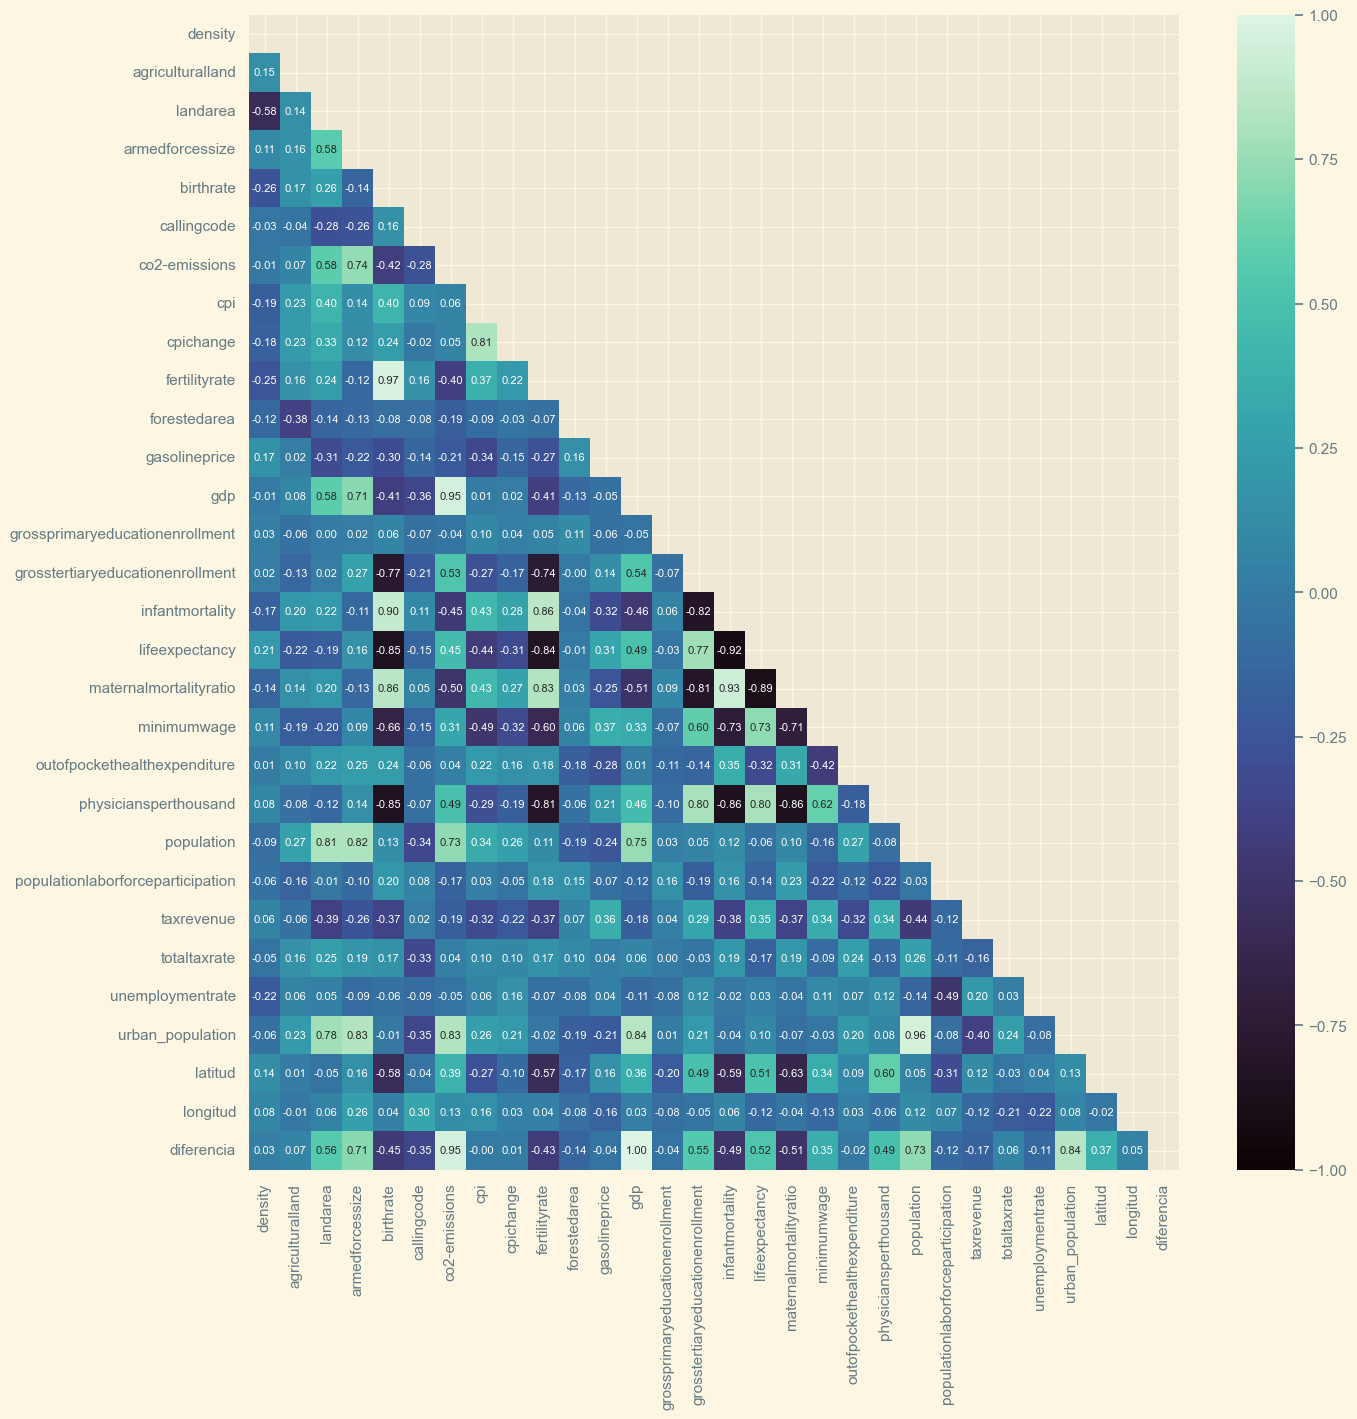

In [22]:
#Tamaño tabla
plt.figure(figsize= (15,15))
#Creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# Cambiamos el tamaño de la letra de los valores de la tabla para que quepan en los cuadraditos
annot_font_size = 8

#Aplicamos la máscara para creat la media tabla
sns.heatmap(df_correlaciones,
            annot= True,
            fmt = ".2f",
            cmap = "mako",
            vmax = 1,
            vmin = -1,
            mask= mask,
            #Aplicamos el nuevo tamaño de letra
            annot_kws={"size": annot_font_size});

Correlaciones fuertes: 

    - Positivas
        - co2-emissions - armedforcessize 0.74
        - cpichange - cpi 0.81
        - gdp - armedforcessize 0.71
        - gdp - co2-emissions 0.95
        - fertilityrate - birthrate 0.97
        - infantmortality - birthrate 0.90
        - infantmortality - fertilityrate 0.86
        - lifeexpectancy - grosstertiaryeducationenrollment 0.77
        - maternalmortalityratio - birthrate 0.86
        - maternalmortalityratio - fertilityrate 0.83
        - maternalmortalityratio - infantmortality 0.93
        - minimunwage - infantmortality 0.93
        - physiciansperthousand - grosstertiaryeducationenrollment 0.80
        - physiciansperthousand - lifeexpectancy 0.80
        - population - landarea 0.81
        - population - armedforcessize 0.82
        - population - co2-emissions 0.73
        - population - gdp 0.75
        - urban_population - landarea 0.78
        - urban_population - armedforcessize 0.83
        - population - co2-emissions 0.83
        - population - gdp 0.84
        - population - urban_population 0.96

    - Negativas
        - grosstertiaryeducationenrollment - birthrate -0.77
        - grosstertiaryeducationenrollment - fertilityrate -0.74 
        - infantmortality - grossprimaryeducationenrollment -0.82
        - lifeexpectancy - birthrate -0.85
        - lifeexpectancy - fertilityrate -0.84
        - lifeexpectancy - infantmortality -0.92
        - maternalmortalityratio - grosstertiaryeducationenrollment -0.81
        - maternalmortalityratio - lifeexpectancy -0.89
        - minimunwage - grosstertiaryeducationenrollment -0.81
        - minimunwage - lifeexpectancy -0.89
        - physiciansperthousand - birthrate -0.85
        - physiciansperthousand - fertilityrate -0.81
        - physiciansperthousand - infantmortality -0.86
        - physiciansperthousand - maternalmortalityratio -0.86

Como tenemos muchas relaciones solo nos vamos a fijar en las correlaciones fuertes.

En general podemos decir que el número de muertes maternas relacionadas con el embarazo y el de muertes infantiles están correlacionadas positivamente con la tasa de fertilidad y la de natalidad. Cuantos más hijos se tienen más aumenta la mortalidad de mujeres y niños. Según suben estas variables baja la esperanza de vida y el acceso a la educación primaria y terciaria.

el salario mínimo está correlacionado positivamente con la mortalidad infantil y negativamente con el acceso a la educación terciaria y a la esperanza de vida.

Cuantos más acceso y participación en la educación terciaria, más médicos hay y también más esperanza de vida, bajando las muertes maternas relacionadas con el embarazo y el de muertes infantiles, y también bajan la tasa de fertilidad y la de natalidad.

El PIB de los países está correlacionado positivamente con las emisiones de CO2, el tamaño de las fuerzas armadas y a la población y población urbana, ambas últimas muy correlacionadas entre sí positivamente.